<a href="https://colab.research.google.com/github/AlfiRam/Horse-Race-Betting-Final-Project---Programming-Lab/blob/main/Machine_Learning_Final_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning Final Project
* Reynard Pradhitya - 21/472680/PA/20321
* Muhammad Alfi Ramadhan - 21/472839/PA/20345
* Reza Aurelio Brilliansah - 21/475037/PA/20515
* Muhammad Zaky Firdaus - 21/477171/PA/20637

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

## Data Acquisition

Import from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test = '/content/drive/MyDrive/ML/ML_testing.csv'
train = '/content/drive/MyDrive/ML/ML_training.csv'

Checking the data

In [ ]:
df = pd.read_csv(test)
df.head()

,No. Sample,RBC,HGB,Cellular HGB,HCT,MCV,MCH,MCHC,CHCM,CH,...,HDW,Retic %,CHr,CHm,RBC % Hyper,RBC % Hypo,RBC % Macro,RBC % Micro,RBC Fragment,Diagnosis
0,D290,5.20,9.8,10.6,31.4,60.4,18.8,31.2,33.8,20.2,...,3.90,1.22,22.4,20.1,4.4,4.1,0.0,49.9,0.07,1
1,K1.164,5.26,10.9,NaN,36.4,69.2,20.8,30.1,NaN,NaN,...,NaN,1.58,25.8,22.2,0.5,5.1,0.0,19.2,0.04,1
2,F744,5.55,11.2,12.4,36.8,66.3,20.2,30.5,33.6,22.1,...,3.40,1.96,24.0,22.0,2.3,3.7,0.0,27.8,0.10,1
3,F678,6.61,11.7,12.9,38.1,57.7,17.7,30.7,33.8,19.3,...,3.62,1.10,22.4,19.5,3.4,3.3,0.0,62.0,0.07,1
4,L1.341,4.92,11.9,12.3,37.5,76.1,24.1,31.7,32.9,24.8,...,2.69,1.43,27.6,24.8,0.7,2.2,0.1,9.6,0.02,1


In [ ]:
df.dtypes

No. Sample       object
RBC             float64
HGB             float64
Cellular HGB    float64
HCT             float64
MCV             float64
MCH             float64
MCHC            float64
CHCM            float64
CH              float64
RDW             float64
HDW             float64
Retic %         float64
CHr             float64
CHm             float64
RBC % Hyper     float64
RBC % Hypo      float64
RBC % Macro     float64
RBC % Micro     float64
RBC Fragment    float64
Diagnosis         int64
dtype: object

In [ ]:
df2 = pd.read_csv(train)
df2.head()

,No. Sample,RBC,HGB,Cellular HGB,HCT,MCV,MCH,MCHC,CHCM,CH,...,HDW,Retic %,CHr,CHm,RBC % Hyper,RBC % Hypo,RBC % Macro,RBC % Micro,RBC Fragment,Diagnosis
0,E541,3.78,9.0,10.1,29.4,77.7,23.8,30.7,34.2,25.9,...,7.23,2.16,28.5,25.5,18.2,20.7,1.2,11.9,0.04,1
1,D272,5.94,10.3,12.0,37.5,63.1,17.4,27.5,32.1,20.1,...,3.59,1.38,23.1,20.3,2.0,9.3,0.0,38.8,0.06,1
2,F728,5.93,10.8,12.0,34.4,58.0,18.2,31.3,34.8,20.0,...,3.96,1.31,22.6,19.8,6.3,2.4,0.0,60.7,0.11,1
3,N1.848,5.29,11.0,11.6,37.6,71.0,20.7,29.2,30.8,21.7,...,3.07,1.42,25.9,22.0,0.7,15.3,0.1,15.4,0.08,1
4,O2320,5.79,11.0,11.9,37.0,63.9,19.0,29.7,32.2,20.4,...,3.36,1.06,24.5,20.7,1.4,8.2,0.0,36.8,0.05,1


## Data Visualization

In [ ]:
columns_to_drop = ['No. Sample']
df2 = df2.drop(columns_to_drop, axis=1)

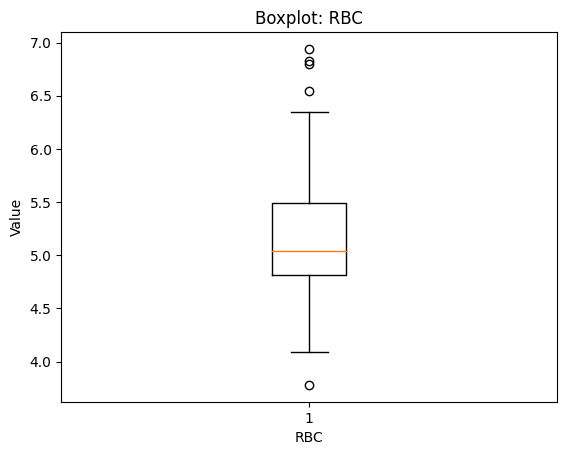

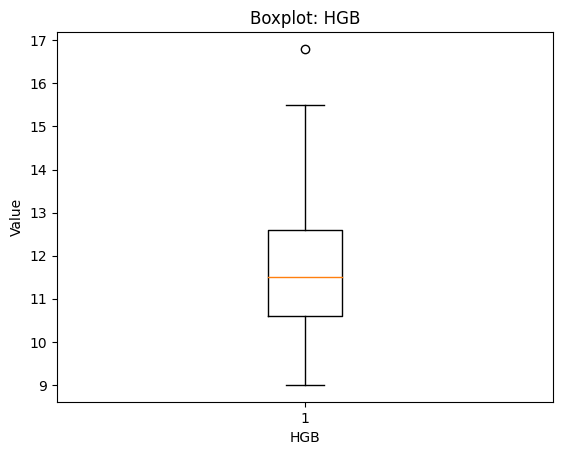

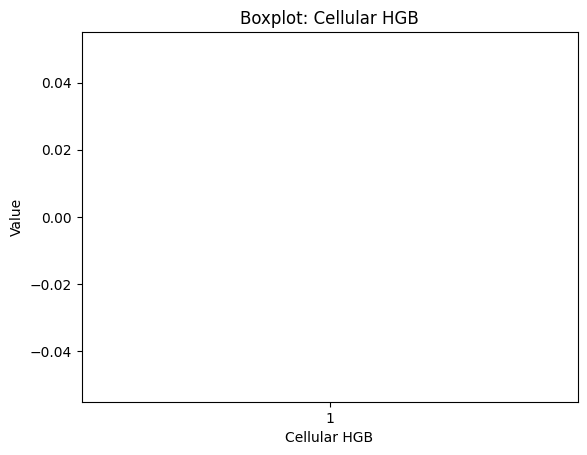

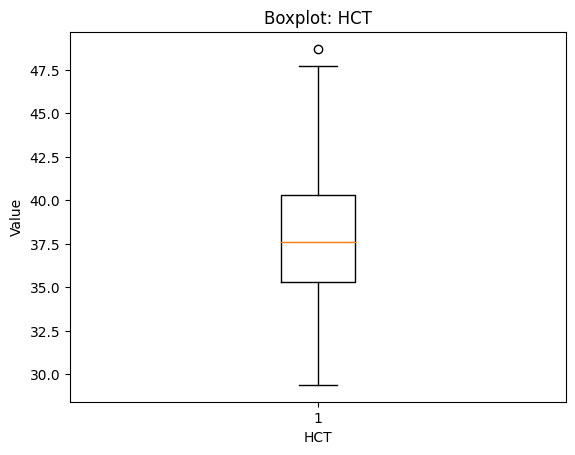

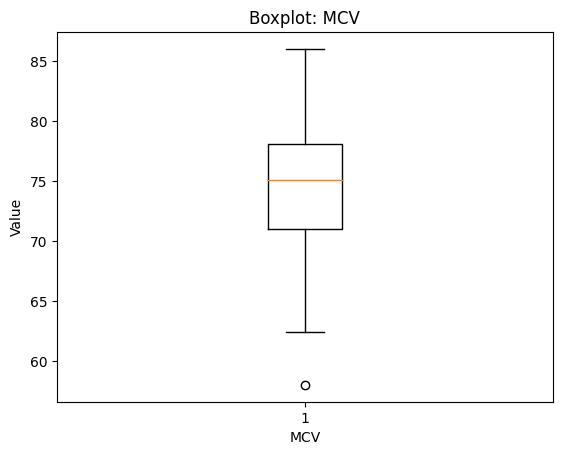

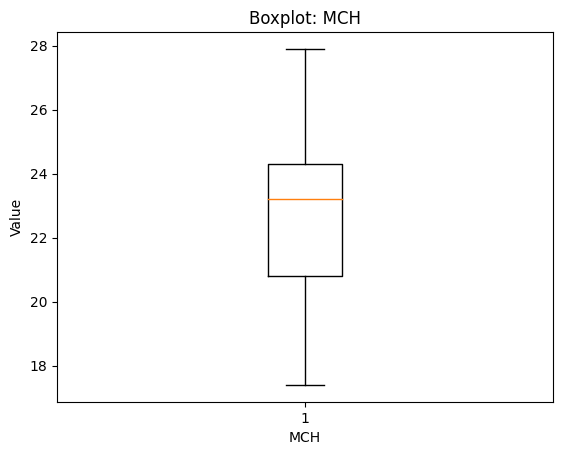

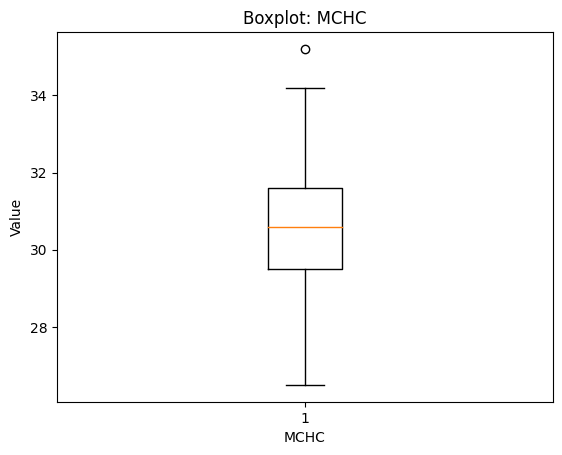

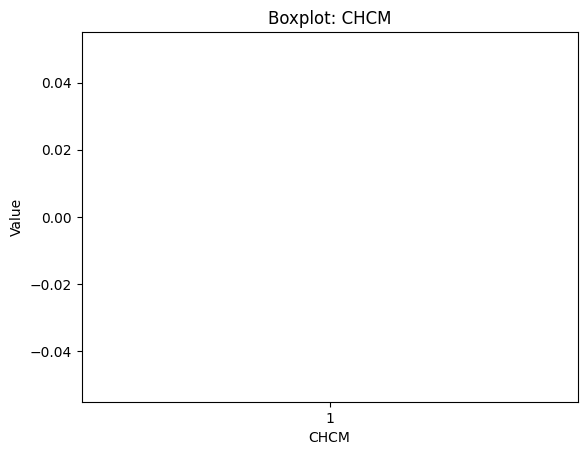

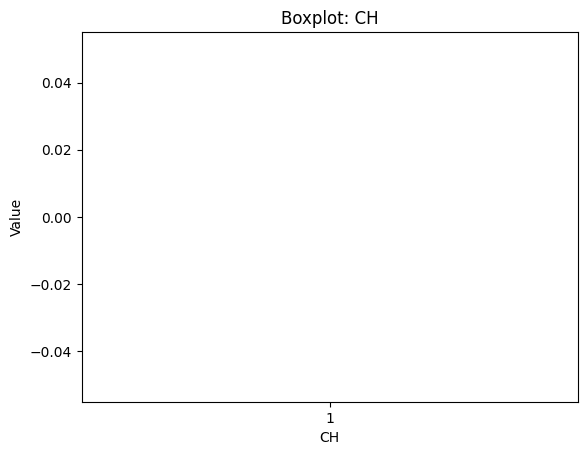

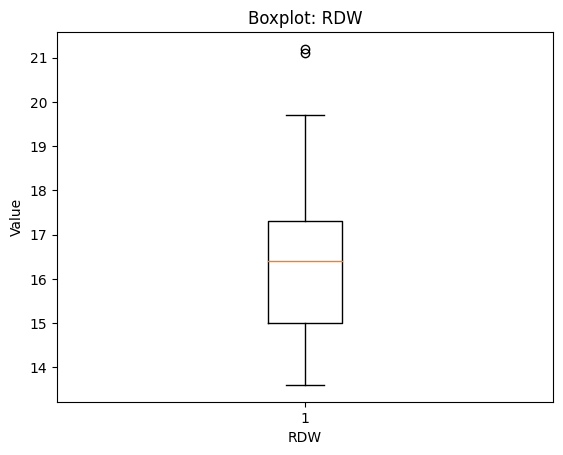

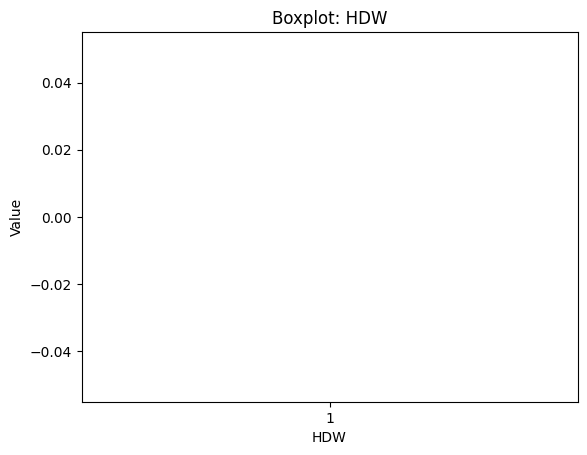

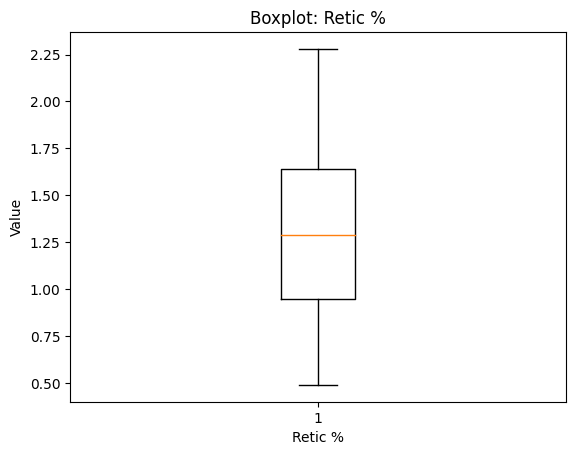

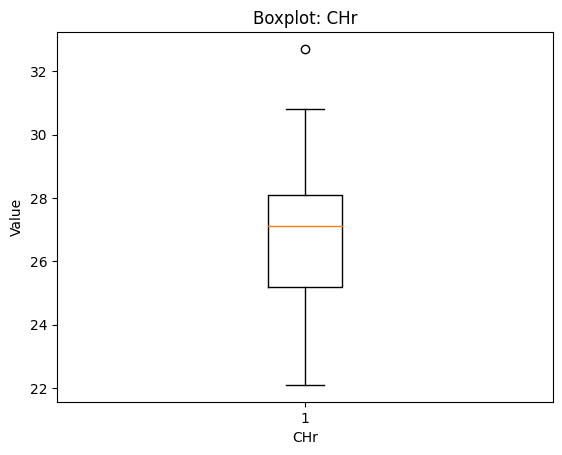

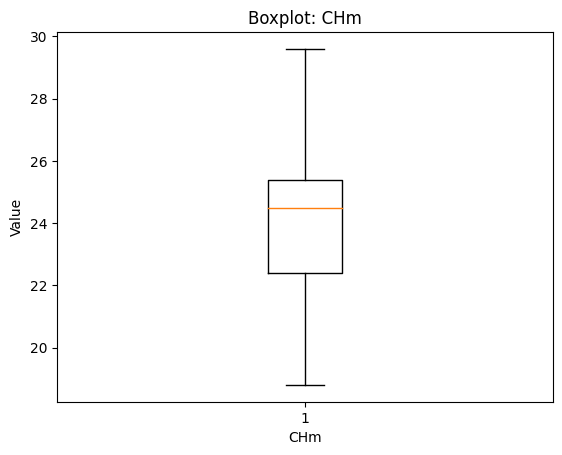

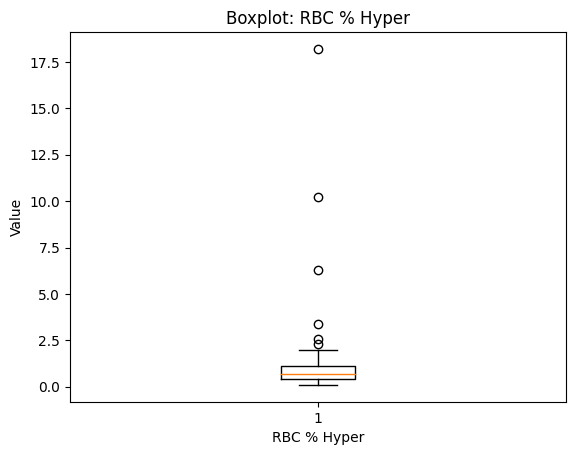

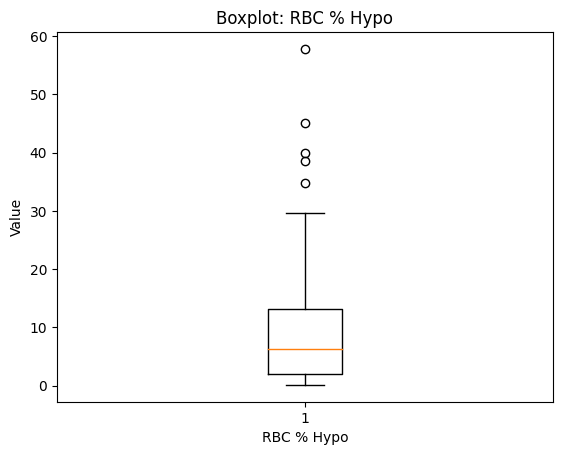

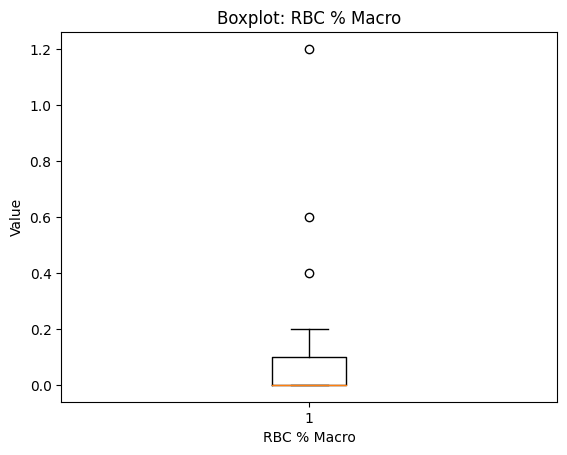

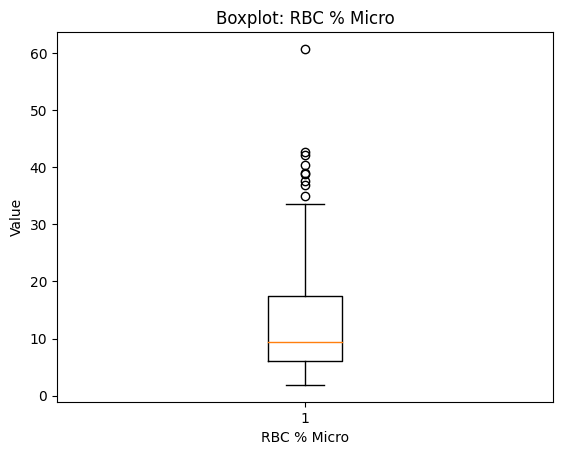

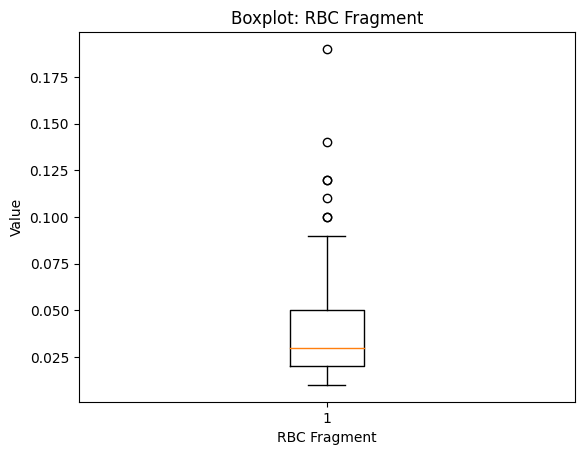

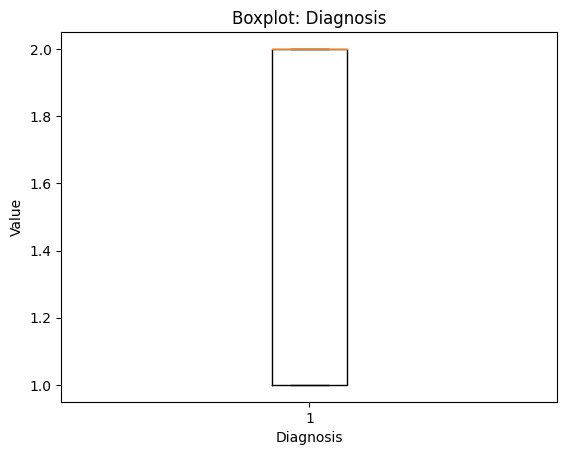

In [ ]:
# creating a boxplot for each variable
for column in df2.columns:
    plt.boxplot(df2[column])
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title(f"Boxplot: {column}")
    plt.show()

Checking the values

In [ ]:
# Check for missing values
df2.isnull().sum()

RBC              0
HGB              0
Cellular HGB    12
HCT              0
MCV              0
MCH              0
MCHC             0
CHCM            12
CH              12
RDW              0
HDW             12
Retic %          0
CHr              0
CHm              0
RBC % Hyper      0
RBC % Hypo       0
RBC % Macro      0
RBC % Micro      0
RBC Fragment     0
Diagnosis        0
dtype: int64

In [ ]:
df2_copy = df2.drop('Diagnosis', axis=1)

In [ ]:
df2_copy.head()

,RBC,HGB,Cellular HGB,HCT,MCV,MCH,MCHC,CHCM,CH,RDW,HDW,Retic %,CHr,CHm,RBC % Hyper,RBC % Hypo,RBC % Macro,RBC % Micro,RBC Fragment
0,3.78,9.0,10.1,29.4,77.7,23.8,30.7,34.2,25.9,21.1,7.23,2.16,28.5,25.5,18.2,20.7,1.2,11.9,0.04
1,5.94,10.3,12.0,37.5,63.1,17.4,27.5,32.1,20.1,15.9,3.59,1.38,23.1,20.3,2.0,9.3,0.0,38.8,0.06
2,5.93,10.8,12.0,34.4,58.0,18.2,31.3,34.8,20.0,16.0,3.96,1.31,22.6,19.8,6.3,2.4,0.0,60.7,0.11
3,5.29,11.0,11.6,37.6,71.0,20.7,29.2,30.8,21.7,16.9,3.07,1.42,25.9,22.0,0.7,15.3,0.1,15.4,0.08
4,5.79,11.0,11.9,37.0,63.9,19.0,29.7,32.2,20.4,16.6,3.36,1.06,24.5,20.7,1.4,8.2,0.0,36.8,0.05


Fixing the values

In [ ]:
# Calculate averages and standard deviation for each column
column_averages = df2_copy.mean()
column_std = df2_copy.std()

In [ ]:
# Replace null values with column averages
df2_copy = df2_copy.fillna(column_averages)

In [ ]:
threshold = 2 * column_std

# Replace outlier values with column averages
for column in df2_copy.columns:
    outlier_mask = (df2_copy[column] - column_averages[column]).abs() > threshold[column]
    df2_copy.loc[outlier_mask, column] = column_averages[column]

In [ ]:
df2.head()

,RBC,HGB,Cellular HGB,HCT,MCV,MCH,MCHC,CHCM,CH,RDW,HDW,Retic %,CHr,CHm,RBC % Hyper,RBC % Hypo,RBC % Macro,RBC % Micro,RBC Fragment,Diagnosis
0,3.78,9.0,10.1,29.4,77.7,23.8,30.7,34.2,25.9,21.1,7.23,2.16,28.5,25.5,18.2,20.7,1.2,11.9,0.04,1
1,5.94,10.3,12.0,37.5,63.1,17.4,27.5,32.1,20.1,15.9,3.59,1.38,23.1,20.3,2.0,9.3,0.0,38.8,0.06,1
2,5.93,10.8,12.0,34.4,58.0,18.2,31.3,34.8,20.0,16.0,3.96,1.31,22.6,19.8,6.3,2.4,0.0,60.7,0.11,1
3,5.29,11.0,11.6,37.6,71.0,20.7,29.2,30.8,21.7,16.9,3.07,1.42,25.9,22.0,0.7,15.3,0.1,15.4,0.08,1
4,5.79,11.0,11.9,37.0,63.9,19.0,29.7,32.2,20.4,16.6,3.36,1.06,24.5,20.7,1.4,8.2,0.0,36.8,0.05,1


In [ ]:
df2_copy.head()

,RBC,HGB,Cellular HGB,HCT,MCV,MCH,MCHC,CHCM,CH,RDW,HDW,Retic %,CHr,CHm,RBC % Hyper,RBC % Hypo,RBC % Macro,RBC % Micro,RBC Fragment
0,5.171593,9.0,10.1,38.19646,77.700000,23.800000,30.70000,34.2,25.9,16.380531,2.992871,2.16,28.5,25.5,1.102655,20.7,0.060177,11.900000,0.040000
1,5.940000,10.3,12.0,37.50000,74.131858,22.627434,30.49115,32.1,20.1,15.900000,3.590000,1.38,23.1,20.3,2.000000,9.3,0.000000,13.702655,0.060000
2,5.930000,10.8,12.0,34.40000,74.131858,18.200000,31.30000,34.8,20.0,16.000000,3.960000,1.31,22.6,19.8,1.102655,2.4,0.000000,13.702655,0.041593
3,5.290000,11.0,11.6,37.60000,71.000000,20.700000,29.20000,30.8,21.7,16.900000,3.070000,1.42,25.9,22.0,0.700000,15.3,0.100000,15.400000,0.080000
4,5.790000,11.0,11.9,37.00000,63.900000,19.000000,29.70000,32.2,20.4,16.600000,3.360000,1.06,24.5,20.7,1.400000,8.2,0.000000,13.702655,0.050000


In [ ]:
df2_updated = df2_copy.copy()

In [ ]:
# Combine outlier handling with original diagnosis data
df2_updated["Diagnosis"] = df2["Diagnosis"]

In [ ]:
df2_updated.head()

,RBC,HGB,Cellular HGB,HCT,MCV,MCH,MCHC,CHCM,CH,RDW,HDW,Retic %,CHr,CHm,RBC % Hyper,RBC % Hypo,RBC % Macro,RBC % Micro,RBC Fragment,Diagnosis
0,5.171593,9.0,10.1,38.19646,77.700000,23.800000,30.70000,34.2,25.9,16.380531,2.992871,2.16,28.5,25.5,1.102655,20.7,0.060177,11.900000,0.040000,1
1,5.940000,10.3,12.0,37.50000,74.131858,22.627434,30.49115,32.1,20.1,15.900000,3.590000,1.38,23.1,20.3,2.000000,9.3,0.000000,13.702655,0.060000,1
2,5.930000,10.8,12.0,34.40000,74.131858,18.200000,31.30000,34.8,20.0,16.000000,3.960000,1.31,22.6,19.8,1.102655,2.4,0.000000,13.702655,0.041593,1
3,5.290000,11.0,11.6,37.60000,71.000000,20.700000,29.20000,30.8,21.7,16.900000,3.070000,1.42,25.9,22.0,0.700000,15.3,0.100000,15.400000,0.080000,1
4,5.790000,11.0,11.9,37.00000,63.900000,19.000000,29.70000,32.2,20.4,16.600000,3.360000,1.06,24.5,20.7,1.400000,8.2,0.000000,13.702655,0.050000,1


In [ ]:
df2 = df2_updated

In [ ]:
feature_columns = df2.columns[df2.columns != 'Diagnosis']

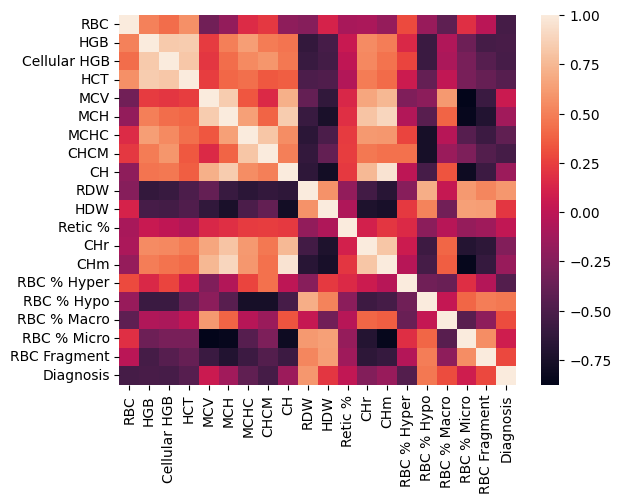

In [ ]:
# Create a heatmap to visualize correlations between variables
sns.heatmap(df2.corr())
plt.show()

## Creating and Training the Model

In [ ]:
# Separate the target class variable and the other variables
X = df2.drop('Diagnosis', axis=1)
y = df2['Diagnosis']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating the models and the parameters for Gridsearch
models = {
    'SVM': (SVC(), {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}),
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [None, 5, 10]}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'n_estimators': [100, 200, 300, 400, 500], 'learning_rate': [0.1, 0.01, 0.001]})
}

Comparing model accuracy

In [ ]:
# Implementing gridsearch to obtain the best parameters for each model
results = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'test_score': grid_search.score(X_val, y_val)
    }

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
for model_name, result in results.items():
    print(model_name)
    print('Best Parameters:', result['best_params'])
    print('Best Training Score:', result['best_score'])
    print('Validation Score:', result['test_score'])
    print()

SVM
Best Parameters: {'C': 100, 'kernel': 'rbf'}
Best Training Score: 0.8666666666666668
Validation Score: 0.9565217391304348

Logistic Regression
Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Training Score: 0.8555555555555555
Validation Score: 0.8695652173913043

Random Forest
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best Training Score: 0.8777777777777779
Validation Score: 0.8260869565217391

Gradient Boosting
Best Parameters: {'learning_rate': 0.001, 'n_estimators': 400}
Best Training Score: 0.8666666666666666
Validation Score: 0.7391304347826086



Training the best model

In [ ]:
# Creating model based on best results
best_params = {'C': 100, 'kernel': 'rbf'}
svm_model = SVC(**best_params)
svm_model.fit(X_train, y_train)

SVC(C=100)

##  Final Results

In [ ]:
# Preprocessing the test data
df = df.drop(columns_to_drop, axis=1)c
olumn_averages = df.mean()
column_std = df.std()

In [ ]:
df = df.fillna(column_averages)

In [ ]:
X_test = df.drop('Diagnosis', axis=1)
y_test = df['Diagnosis']

Obtaining predicted diagnosis values

In [ ]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

Creating the Classification Report

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report: ")
print(classification_rep)

Accuracy:  0.8928571428571429
Classification Report: 
              precision    recall  f1-score   support

           1       0.83      0.91      0.87        22
           2       0.94      0.88      0.91        34

    accuracy                           0.89        56
   macro avg       0.89      0.90      0.89        56
weighted avg       0.90      0.89      0.89        56



Creating the confusion matrix

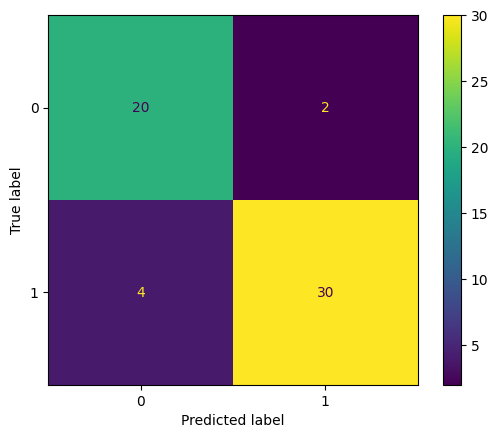

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()